In [1]:
import pandas as pd
df=pd.read_csv("../../data/east/TL_csv/tn_activity_consume_his_활동소비내역_B.csv")
df1 = pd.read_csv("../../data/east/VL_csv/tn_activity_consume_his_활동소비내역_B.csv")
df2 = pd.read_csv("../../data/east/TS_csv/tn_activity_consume_his_활동소비내역_B.csv")
df3 = pd.read_csv("../../data/east/VS_csv/tn_activity_consume_his_활동소비내역_B.csv")


In [2]:
df['TRAVEL_ID'].nunique()


3843

In [3]:
df1['TRAVEL_ID'].nunique()

1740

In [4]:
dupl_data = pd.merge(df,df1, how = 'inner')
print(len(dupl_data))
# ...? 중복된 데이터가 없으면 여행자 id가 4000개가 넘는다는 소린데? ...? 

0


In [5]:
df2['TRAVEL_ID'].nunique()

3843

In [6]:
df3['TRAVEL_ID'].nunique()

1740

In [7]:
dupl_data1 = pd.merge(df,df2, how= 'inner')
print(len(dupl_data1))

19824


# 원천데이터와 라벨링 데이터셋의 차이는 없기때문에 한가지의 set만 골라서 전처리 진행하면 될것이다.

In [8]:
# 사용할 파일 불러오기 여행객 파일 2개 활동소비내역 2개
cons_his = pd.concat([df,df1],axis = 0 , ignore_index=True)
trav_mas_df1 = pd.read_csv("../../data/east/TL_csv/tn_traveller_master_여행객 Master_B.csv")
trav_mas_df2 = pd.read_csv("../../data/east/VL_csv/tn_traveller_master_여행객 Master_B.csv")
trav_mas = pd.concat([trav_mas_df1,trav_mas_df2],axis=0, ignore_index=True)
pd.DataFrame(cons_his)



,TRAVEL_ID,VISIT_AREA_ID,ACTIVITY_TYPE_CD,ACTIVITY_TYPE_SEQ,CONSUME_HIS_SEQ,CONSUME_HIS_SNO,PAYMENT_NUM,BRNO,STORE_NM,ROAD_NM_ADDR,LOTNO_ADDR,ROAD_NM_CD,LOTNO_CD,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC,SGG_CD
0,b_b011174,2210240003,2,1,1,1,1,NaN,코레일유통,대구 동구 동대구로 550,NaN,3007004.0,2.714010e+09,2022-10-24 19:16:00.000,1.0,8000.0,NaN,NaN
1,b_b004534,2210010001,1,0,0,1,3,7.083900e+09,방하착커피앤베이커리,강원 속초시 설악산로 1096,강원 속초시 설악동 151,3223005.0,4.221011e+09,2022-10-01 10:52:00.000,1.0,18000.0,아이스아메리카노,NaN
2,b_b005652,2210120003,1,0,0,1,1,1.728701e+09,내류사,경북 경주시 영불로 263-7,경북 경주시 진현동 71-10,3305043.0,4.713013e+09,2022-10-12 11:29:00.000,1.0,5800.0,ICE바닐라라떼,NaN
3,b_b006597,2210160004,2,4,4,0,2,NaN,베스트할인마트,부산시 동래구 복천로5번길 34 상가동103호,NaN,NaN,NaN,NaN,1.0,1400.0,NaN,2.626010e+09
4,b_b002171,2208210004,1,0,0,1,2,8.081601e+09,도문,강원 속초시 상도문1길 31,강원 속초시 도문동 206-1,4469108.0,4.221011e+09,2022-08-21 11:34:00.000,1.0,11000.0,아메리카노(ICE),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22297,b_b000720,2209010005,1,0,0,1,1,1.078657e+09,코레일유통㈜,강원 강릉시 강동면 정동역길 17,강원 강릉시 강동면 정동진리 303,4460884.0,4.215034e+09,2022-09-01 14:42:00.000,1.0,3200.0,ICED 아메리카노,NaN
22298,b_b005175,2210220002,1,0,0,1,2,8.250602e+09,황정숙막국수,강원 동해시 중앙로 42,강원 동해시 용정동 233-8,3221040.0,4.217010e+09,2022-10-22 12:17:00.000,1.0,25000.0,메밀전병;물막국수,NaN
22299,b_b010055,2210260003,3,0,0,1,1,4.628802e+09,(주)쥬간도,강원 속초시 청호해안길 2,강원 속초시 조양동 1450-143,4469283.0,4.221011e+09,2022-10-26 11:46:00.000,1.0,12000.0,속초아이(대인),NaN
22300,b_b006315,2210020005,3,0,0,2,1,2.268142e+09,농업회사법인 우덕축산주식회사,강원 평창군 대관령면 꽃밭양지길 458-23,NaN,4484055.0,4.276038e+09,2022-10-02 10:31:00.000,1.0,5000.0,반려견 입장,NaN


In [9]:
pd.DataFrame(trav_mas)

,TRAVELER_ID,RESIDENCE_SGG_CD,GENDER,AGE_GRP,EDU_NM,EDU_FNSH_SE,MARR_STTS,FAMILY_MEMB,JOB_NM,JOB_ETC,...,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_STATUS_YMD,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,TRAVEL_MOTIVE_3,TRAVEL_COMPANIONS_NUM
0,b009514,31,여,20,6,1,1,3,3.0,NaN,...,2,4,울산광역시,경남,2인 여행(가족 외),2022-10-30~2022-10-30,6,2.0,NaN,1
1,b015795,29,여,30,6,1,1,1,3.0,NaN,...,6,6,광주광역시,대구,나홀로 여행,2022-10-29~2022-10-29,8,2.0,1.0,0
2,b004208,31,여,20,6,1,1,4,2.0,NaN,...,6,5,울산광역시,경북,2인 여행(가족 외),2022-09-24~2022-09-25,3,7.0,5.0,1
3,b006840,11,여,30,6,1,1,4,3.0,NaN,...,1,7,서울특별시,강원,나홀로 여행,2022-10-05~2022-10-05,5,7.0,1.0,1
4,b002386,26,남,40,4,1,2,4,5.0,NaN,...,7,7,부산광역시,울산,자녀 동반 여행,2022-08-22~2022-08-23,3,7.0,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,b006766,11,여,20,6,1,1,1,3.0,NaN,...,5,5,서울특별시,강원,3인 이상 여행(가족 외),2022-10-03~2022-10-03,7,2.0,3.0,2
3596,b000760,11,여,20,6,1,2,2,3.0,NaN,...,6,7,서울특별시,경북,2인 가족 여행,2022-08-20~2022-08-22,2,1.0,NaN,1
3597,b004329,11,남,40,6,1,2,3,3.0,NaN,...,1,7,서울특별시,강원,3대 동반 여행(친척 포함),2022-10-02~2022-10-03,2,1.0,8.0,3
3598,b005893,11,여,30,6,1,1,2,3.0,NaN,...,1,7,서울특별시,강원,3인 이상 여행(가족 외),2022-10-03~2022-10-03,7,6.0,5.0,2


In [10]:
cons_his["TRAVEL_ID"].nunique()

3890

# TRAVELER_ID != TRAVEL_ID (두개의 갯수가 다른 이유를 파악해봐야할거같다.)

In [11]:
# 사용할 컬럼만 추출하기
cons_his = cons_his[['TRAVEL_ID','VISIT_AREA_ID','ACTIVITY_TYPE_CD']]
trav_mas=trav_mas[["AGE_GRP","TRAVEL_COMPANIONS_NUM","TRAVEL_STATUS_ACCOMPANY","TRAVELER_ID","TRAVEL_STYL_1", "TRAVEL_STYL_2", "TRAVEL_STYL_3", "TRAVEL_STYL_4", "TRAVEL_STYL_5", "TRAVEL_STYL_6", "TRAVEL_STYL_7", "TRAVEL_STYL_8","TRAVEL_MOTIVE_1","TRAVEL_MOTIVE_2","TRAVEL_MOTIVE_3"]]

In [12]:
from preprocess import preprocess_data
mapping_plan = {'TRAVEL_STYL_1': 'TSY', 'TRAVEL_STYL_2': 'TSY', 'TRAVEL_STYL_3': 'TSY',
        'TRAVEL_STYL_4': 'TSY', 'TRAVEL_STYL_5': 'TSY', 'TRAVEL_STYL_6': 'TSY',
        'TRAVEL_STYL_7': 'TSY', 'TRAVEL_STYL_8': 'TSY','ACTIVITY_TYPE_CD':'ACT',"TRAVEL_MOTIVE_1":"TMT","TRAVEL_MOTIVE_2":"TMT","TRAVEL_MOTIVE_3":"TMT"}
rename_map = {'TRAVEL_ID':'여행ID',
'VISIT_AREA_ID':'방문지ID','ACTIVITY_TYPE_CD':'활동유형코드',"TRAVELER_ID": "여행ID",
    "RESIDENCE_SGG_CD": "거주시군구코드",
    "GENDER": "성별",
    "AGE_GRP": "연령대",
    "EDU_NM": "최종학력명",
    "EDU_FNSH_SE": "최종학력여부",
    "MARR_STTS": "결혼상태",
    "FAMILY_MEMB": "가구원수",
    "JOB_NM": "직업",
    "JOB_ETC": "직업_기타",
    "INCOME": "본인소득",
    "HOUSE_INCOME": "가구소득",
    "TRAVEL_TERM": "여행일수_기간",
    "TRAVEL_NUM": "여행빈도",
    "TRAVEL_LIKE_SIDO_1": "선호여행_시도_1",
    "TRAVEL_LIKE_SGG_1": "선호여행_시군구_1",
    "TRAVEL_LIKE_SIDO_2": "선호여행_시도_2",
    "TRAVEL_LIKE_SGG_2": "선호여행_시군구_2",
    "TRAVEL_LIKE_SIDO_3": "선호여행_시도_3",
    "TRAVEL_LIKE_SGG_3": "선호여행_시군구_3",
    "TRAVEL_STYL_1": "여행스타일1",
    "TRAVEL_STYL_2": "여행스타일2",
    "TRAVEL_STYL_3": "여행스타일3",
    "TRAVEL_STYL_4": "여행스타일4",
    "TRAVEL_STYL_5": "여행스타일5",
    "TRAVEL_STYL_6": "여행스타일6",
    "TRAVEL_STYL_7": "여행스타일7",
    "TRAVEL_STYL_8": "여행스타일8",
    "TRAVEL_STATUS_RESIDENCE": "여행출발_거주지",
    "TRAVEL_STATUS_DESTINATION": "여행출발_도착지",
    "TRAVEL_STATUS_ACCOMPANY": "여행동행_유형",
    "TRAVEL_STATUS_YMD": "여행출발일자",
    "TRAVEL_MOTIVE_1": "여행동기1",
    "TRAVEL_MOTIVE_2": "여행동기2",
    "TRAVEL_MOTIVE_3": "여행동기3",
    "TRAVEL_COMPANIONS_NUM": "여행동반자수"}
cons_his_df = preprocess_data(
    cons_his,
    mapping_plan,
    rename_map,
    output_filename="cons_his_East.csv"
)

trav_mas_df = preprocess_data(
    trav_mas,
    mapping_plan,
    rename_map,
    output_filename="trav_mas_East.csv"
)

'       TRAVEL_ID  VISIT_AREA_ID  ACTIVITY_TYPE_CD
0      b_b011174     2210240003                 2
1      b_b004534     2210010001                 1
2      b_b005652     2210120003                 1
3      b_b006597     2210160004                 2
4      b_b002171     2208210004                 1
...          ...            ...               ...
22297  b_b000720     2209010005                 1
22298  b_b005175     2210220002                 1
22299  b_b010055     2210260003                 3
22300  b_b006315     2210020005                 3
22301  b_b001275     2208220002                 1

[22302 rows x 3 columns]',컬럼 'TRAVEL_STYL_1'이 DataFrame에 존재하지 않습니다. 건너뜁니다.
'       TRAVEL_ID  VISIT_AREA_ID  ACTIVITY_TYPE_CD
0      b_b011174     2210240003                 2
1      b_b004534     2210010001                 1
2      b_b005652     2210120003                 1
3      b_b006597     2210160004                 2
4      b_b002171     2208210004                 1
...          ...      

In [13]:
cons_his_df.head()

,여행ID,방문지ID,활동유형코드
0,b_b011174,2210240003,쇼핑 / 구매
1,b_b004534,2210010001,취식
2,b_b005652,2210120003,취식
3,b_b006597,2210160004,쇼핑 / 구매
4,b_b002171,2208210004,취식


In [14]:
# 여행 동기를 추가해야 될것 같음
trav_mas_df.head()

,연령대,여행동반자수,여행동행_유형,여행ID,여행스타일1,여행스타일2,여행스타일3,여행스타일4,여행스타일5,여행스타일6,여행스타일7,여행스타일8,여행동기1,여행동기2,여행동기3
0,20,1,2인 여행(가족 외),b009514,자연 선호 약간선호,중립,자연 선호 중간선호,중립,중립,중립,자연 선호 중간선호,중립,"운동, 건강 증진 및 충전","쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",NaN
1,30,0,나홀로 여행,b015795,도시 선호 중간선호,자연 선호 매우선호,자연 선호 매우선호,자연 선호 약간선호,도시 선호 중간선호,자연 선호 매우선호,도시 선호 중간선호,도시 선호 중간선호,"역사 탐방, 문화적 경험 등 교육적 동기","쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식","일상적인 환경 및 역할에서의 탈출, 지루함 탈피"
2,20,1,2인 여행(가족 외),b004208,중립,자연 선호 약간선호,자연 선호 약간선호,중립,중립,중립,도시 선호 중간선호,도시 선호 약간선호,여행 동반자와의 친밀감 및 유대감 증진,새로운 경험 추구,SNS 사진 등록 등 과시
3,30,1,나홀로 여행,b006840,중립,중립,자연 선호 중간선호,자연 선호 중간선호,도시 선호 중간선호,도시 선호 약간선호,자연 선호 매우선호,도시 선호 매우선호,SNS 사진 등록 등 과시,새로운 경험 추구,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피"
4,40,3,자녀 동반 여행,b002386,자연 선호 매우선호,자연 선호 매우선호,자연 선호 약간선호,자연 선호 약간선호,자연 선호 매우선호,자연 선호 중간선호,도시 선호 매우선호,도시 선호 매우선호,여행 동반자와의 친밀감 및 유대감 증진,새로운 경험 추구,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식"


In [15]:
cons_his_df[cons_his_df["여행ID"]=="b_b009514"]

,여행ID,방문지ID,활동유형코드
484,b_b009514,2210300003,취식
5134,b_b009514,2210300002,쇼핑 / 구매
7170,b_b009514,2210300005,취식


In [16]:
trav_mas_df[trav_mas_df['여행ID']=='b009514']

,연령대,여행동반자수,여행동행_유형,여행ID,여행스타일1,여행스타일2,여행스타일3,여행스타일4,여행스타일5,여행스타일6,여행스타일7,여행스타일8,여행동기1,여행동기2,여행동기3
0,20,1,2인 여행(가족 외),b009514,자연 선호 약간선호,중립,자연 선호 중간선호,중립,중립,중립,자연 선호 중간선호,중립,"운동, 건강 증진 및 충전","쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",NaN


In [17]:
trav_mas_df["여행스타일1"].value_counts(dropna=False)

자연 선호 중간선호    994
중립            751
자연 선호 매우선호    696
자연 선호 약간선호    519
도시 선호 중간선호    285
도시 선호 약간선호    226
도시 선호 매우선호    129
Name: 여행스타일1, dtype: int64

In [18]:
trav_mas_df["여행동기1"].value_counts(dropna=False)

일상적인 환경 및 역할에서의 탈출, 지루함 탈피          928
여행 동반자와의 친밀감 및 유대감 증진               876
쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식       811
새로운 경험 추구                           349
역사 탐방, 문화적 경험 등 교육적 동기              155
운동, 건강 증진 및 충전                      127
진정한 자아 찾기 또는 자신을 되돌아볼 기회 찾기         121
SNS 사진 등록 등 과시                       99
특별한 목적(칠순여행, 신혼여행, 수학여행, 인센티브여행)     87
기타                                   47
Name: 여행동기1, dtype: int64

# 불일치율 정의의 한계 및 추가 고려 변수
```
여행자의 스타일 또는 여행 동기만으로는 불일치율을 명확히 설명하기에 다소 정보가 부족하다는 판단이 들었습니다. 실제 활동 소비와의 관계를 보다 정확히 해석하기 위해서는 다음과 같은 추가 변수들의 고려가 필요하다고 판단하였습니다.

여행 목적

방문지 유형 코드 (VISIT_AREA_TYPE_CD)

방문지 선택 이유 코드 (VISIT_CHC_REASON_CD)

이러한 변수들을 종합적으로 고려함으로써, 여행자의 실제 행동과 선호 간의 불일치를 보다 정교하게 측정하고 설명할 수 있는 기반을 마련하고자 하였습니다.
```


In [19]:
activity_count_by_travel = cons_his_df.groupby('여행ID')['활동유형코드'].count().reset_index()
activity_count_by_travel.columns = ['여행ID', '활동건수']
activity_count_by_travel.describe()

,활동건수
count,3890.000000
mean,5.733162
std,4.028857
min,1.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,28.000000


In [20]:
cons_his_df['활동유형코드'].value_counts()

취식                 15011
쇼핑 / 구매             3780
체험 활동 / 입장 및 관람     3089
기타 활동                399
휴식                    12
단순 구경 / 산책 / 걷기       10
환승/경유                  1
Name: 활동유형코드, dtype: int64

In [21]:
va_info_df1 = pd.read_csv("../../data/east/TL_csv/tn_visit_area_info_방문지정보_B.csv")
va_info_df2 = pd.read_csv("../../data/east/VL_csv/tn_visit_area_info_방문지정보_B.csv")
va_info = pd.concat([va_info_df1,va_info_df2],axis=0, ignore_index=True)
pd.DataFrame(va_info)

C:\Users\soomi\AppData\Local\Temp\ipykernel_25616\2585645833.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  va_info_df1 = pd.read_csv("../../data/east/TL_csv/tn_visit_area_info_방문지정보_B.csv")


,VISIT_AREA_ID,TRAVEL_ID,VISIT_ORDER,VISIT_AREA_NM,VISIT_START_YMD,VISIT_END_YMD,ROAD_NM_ADDR,LOTNO_ADDR,X_COORD,Y_COORD,...,POI_NM,RESIDENCE_TIME_MIN,VISIT_AREA_TYPE_CD,REVISIT_YN,VISIT_CHC_REASON_CD,LODGING_TYPE_CD,DGSTFN,REVISIT_INTENTION,RCMDTN_INTENTION,SGG_CD
0,2209040011,b_b001138,7,광안리해수욕장,2022-09-04,2022-09-04,부산 수영구 광안해변로 219,부산 수영구 광안동 192-20,129.1189761,35.153193,...,광안리해수욕장,30.0,1,N,1.0,NaN,4.0,4.0,4.0,NaN
1,2208200002,b_b000246,2,김포국제공항 국내선,2022-08-20,2022-08-20,서울 강서구 하늘길 112,서울 강서구 공항동 1373,126.8028655,37.558949,...,NaN,60.0,9,Y,6.0,NaN,5.0,5.0,5.0,NaN
2,2209250005,b_b004595,11,여주휴게소주유소 인천방향,2022-09-25,2022-09-25,경기 여주시 가남읍 화평길 116,경기 여주시 가남읍 본두리 677-1,127.5687835,37.239739,...,NaN,30.0,9,Y,11.0,NaN,4.0,4.0,4.0,NaN
3,2210040003,b_b005102,13,감자바우옹심이칼국수,2022-10-04,2022-10-04,강원 영월군 영월읍 중앙로 183-1,강원 영월군 영월읍 덕포리 632-64,128.4776642,37.175971,...,NaN,60.0,11,N,2.0,NaN,5.0,5.0,5.0,NaN
4,2209270005,b_b005081,16,속초고속버스터미널,2022-09-27,2022-09-27,강원 속초시 동해대로 3988,강원 속초시 조양동 1418,128.598776,38.190461,...,속초고속버스터미널,0.0,9,Y,6.0,NaN,5.0,5.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41602,2209020008,b_b001420,16,속초관광수산시장,2022-09-02,2022-09-02,강원 속초시 중앙로147번길 16,강원 속초시 중앙동 471-4,128.59018,38.204544,...,속초종합중앙시장,60.0,4,Y,4.0,NaN,5.0,5.0,5.0,NaN
41603,2209300011,b_b004484,11,해운대블루라인파크 미포정거장,2022-09-30,2022-09-30,부산 해운대구 달맞이길62번길 13,부산 해운대구 중동 1019-2,129.17282,35.158152,...,미포정거장,90.0,13,N,5.0,NaN,5.0,2.0,3.0,NaN
41604,2210280001,b_b015371,1,집,2022-10-28,2022-10-28,NaN,NaN,NaN,NaN,...,"양우내안애3차센트럴아파트,302동",NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41605,2209300002,b_b004841,2,가평휴게소 춘천방향,2022-09-30,2022-09-30,경기 가평군 설악면 미사리로540번길 51,경기 가평군 설악면 미사리,127.546824,37.701933,...,가평휴게소,30.0,9,Y,7.0,NaN,4.0,4.0,4.0,NaN


In [22]:
mapping_plan = {"VISIT_AREA_TYPE_CD": "VIS",
    "VISIT_CHC_REASON_CD": "REN",
    "DGSTFN": "DGS",
    "REVISIT_INTENTION": "REP",
    "RCMDTN_INTENTION": "REC",
    "LODGING_TYPE_CD": "HTY"}
rename_map = {"TRAVEL_ID": "여행ID",
    "VISIT_AREA_ID": "방문지 ID",
    "VISIT_ORDER": "진행순서",
    "VISIT_AREA_NM": "방문지명",
    "VISIT_START_YMD": "방문시작일자",
    "VISIT_END_YMD": "방문종료일자",
    "ROAD_NM_ADDR": "도로명주소",
    "LOTNO_ADDR": "지번주소",
    "X_COORD": "X좌표",
    "Y_COORD": "Y좌표",
    "ROAD_NM_CD": "도로명코드",
    "LOTNO_CD": "지번코드",
    "POI_ID": "POI ID",
    "POI_NM": "POI명",
    "RESIDENCE_TIME_MIN": "체류시간_분",
    "VISIT_AREA_TYPE_CD": "방문지역유형코드",
    "REVISIT_YN": "재방문여부",
    "VISIT_CHC_REASON_CD": "방문선택이유코드",
    "LODGING_TYPE_CD": "숙소유형코드",
    "DGSTFN": "만족도",
    "REVISIT_INTENTION": "재방문의향",
    "RCMDTN_INTENTION": "추천의향",
    "SGG_CD": "시군구코드"}
va_info_df = preprocess_data(
    va_info,
    mapping_plan,
    rename_map,
    output_filename="va_info_East.csv"
)


In [23]:
va_info = va_info_df[['여행ID','진행순서','방문지명','POI명','방문지역유형코드','방문선택이유코드']]

In [24]:
va_info = va_info.sort_values(by= ['여행ID','진행순서']).reset_index(drop=True)

In [25]:
va_info['여행ID'].value_counts()

c_c002510    48
b_b002525    46
b_b000628    43
b_b004017    42
b_b014922    41
             ..
b_b006383     2
b_b008408     2
b_b004586     1
b_b013766     1
b_b010759     1
Name: 여행ID, Length: 4000, dtype: int64

In [26]:
va_info[(va_info['진행순서']==1) & (va_info['방문지명']=='집')]

,여행ID,진행순서,방문지명,POI명,방문지역유형코드,방문선택이유코드
0,a_a000155,1,집,뷰티매화빌라,집,NaN
16,a_a000193,1,집,CU,집,NaN
36,a_a000316,1,집,NaN,집,NaN
54,a_a000330,1,집,브라운스톤진월아파트/103동,집,NaN
78,a_a000423,1,집,NaN,집,NaN
...,...,...,...,...,...,...
41506,d_d003982,1,집,현대아파트2차/201동,집,NaN
41513,d_d005168,1,집,NaN,집,NaN
41543,d_d005737,1,집,NaN,집,NaN
41565,d_d006239,1,집,NaN,집,NaN


In [27]:
va_info.sort_values(["여행ID", "진행순서"]).groupby("여행ID").tail(1)

,여행ID,진행순서,방문지명,POI명,방문지역유형코드,방문선택이유코드
15,a_a000155,16,집,NaN,집,NaN
35,a_a000193,24,집,CU,집,NaN
53,a_a000316,18,집,NaN,집,NaN
77,a_a000330,27,집,브라운스톤진월아파트/103동,집,NaN
91,a_a000423,17,신매역 대구2호선,NaN,집,NaN
...,...,...,...,...,...,...
41542,d_d005253,17,선부3동 1117,NaN,집,NaN
41564,d_d005737,24,집,NaN,집,NaN
41574,d_d006239,12,집,NaN,집,NaN
41581,d_d007458,7,집,월배2차아이파크아파트/아이파크에벤에셀유치원,집,NaN


In [28]:
# 1. 여행ID별 첫 행과 마지막 행 구하기
sorted_va = va_info.sort_values(["여행ID", "진행순서"])
first = sorted_va.groupby("여행ID").first()
last = sorted_va.groupby("여행ID").last()

# 2. 조건에 맞는 여행ID 추출
target_ids = first[first["방문지역유형코드"] != "집"].index.intersection(
    last[last["방문지역유형코드"] == "집"].index
)

# 3. 원본 데이터에서 해당 ID의 첫행과 마지막행만 추출
first_rows = sorted_va.groupby("여행ID").first().loc[target_ids]
last_rows = sorted_va.groupby("여행ID").last().loc[target_ids]

# 4. 첫행과 마지막행을 합치기
result = pd.concat([first_rows, last_rows]).sort_values(["여행ID", "진행순서"]).reset_index()


In [29]:
result

,여행ID,진행순서,방문지명,POI명,방문지역유형코드,방문선택이유코드
0,a_a003379,1,사무실,구산타워,사무실,지나가다 우연히
1,a_a003379,10,집,여수해상케이블카놀아정류장,집,"온라인(SNS, 블로그 등) 평가가 좋아서"
2,b_b000001,2,동신사우나,동신목욕탕,친구/친지집,기타
3,b_b000001,16,집,사우나이발관,집,기타
4,b_b000013,2,육풍 수원인계점,태W산,식당/카페,지인의 추천이 있어서
...,...,...,...,...,...,...
1145,d_d001359,20,집,하이원추추파크네이쳐빌,집,기타
1146,d_d002966,1,사무실,한신포차,사무실,지나가다 우연히
1147,d_d002966,15,경남아파트,경남아너스빌아파트,집,지명도/명소/핫플레이스
1148,d_d005253,2,오래된할매가야밀면,송림공원,식당/카페,지명도/명소/핫플레이스


In [30]:
# 1. 진행순서 기준으로 정렬
sorted_va = va_info.sort_values(["여행ID", "진행순서"])

# 2. 여행 ID별 첫 행과 마지막 행 추출
first = sorted_va.groupby("여행ID").first()
last = sorted_va.groupby("여행ID").last()

# 3. 시작과 끝 모두 '집'인 여행ID만 필터링
home_start_end_ids = first[first["방문지역유형코드"] == "집"].index.intersection(
    last[last["방문지역유형코드"] == "집"].index
)

# 4. 해당 여행 ID들의 첫 행과 마지막 행만 추출
first_rows = first.loc[home_start_end_ids]
last_rows = last.loc[home_start_end_ids]

# 5. 병합하여 결과 생성
result_home_to_home = pd.concat([first_rows, last_rows]).sort_values(["여행ID", "진행순서"]).reset_index()
result_home_to_home

,여행ID,진행순서,방문지명,POI명,방문지역유형코드,방문선택이유코드
0,a_a000155,1,집,뷰티매화빌라,집,"온라인(SNS, 블로그 등) 평가가 좋아서"
1,a_a000155,16,집,평창상휴게소2,집,지나가다 우연히
2,a_a000193,1,집,CU,집,가기 편해서/교통이 좋아서
3,a_a000193,24,집,CU,집,가기 편해서/교통이 좋아서
4,a_a000316,1,집,경포더블루핀신축공사(주)홍성건설,집,가성비가 좋아서
...,...,...,...,...,...,...
5193,d_d005737,24,집,부산역,집,가기 편해서/교통이 좋아서
5194,d_d006239,1,집,낙산해수욕장,집,지명도/명소/핫플레이스
5195,d_d006239,12,집,거창코아루에듀시티아파트/105동,집,지명도/명소/핫플레이스
5196,d_d007458,1,집,월배2차아이파크아파트/아이파크에벤에셀유치원,집,"온라인(SNS, 블로그 등) 평가가 좋아서"


In [31]:
va_info[va_info['방문지역유형코드']=='기타'].head()

,여행ID,진행순서,방문지명,POI명,방문지역유형코드,방문선택이유코드
18,a_a000193,3,픽업투유,NaN,기타,편의시설/서비스가 좋아서
56,a_a000330,3,동서울대학교,동서울대학교/2호관,기타,기타
232,a_a003500,5,한국해양대학교 다운타운캠퍼스,국제오피스텔,기타,지나가다 우연히
551,b_b000036,8,광안대교,NaN,기타,지명도/명소/핫플레이스
600,b_b000053,20,더케이호텔 경주,경주교육문화회관,기타,편의시설/서비스가 좋아서


In [32]:
va_info[va_info['방문지역유형코드']=='상업지구(거리, 시장, 쇼핑시설)'].head()

,여행ID,진행순서,방문지명,POI명,방문지역유형코드,방문선택이유코드
52,a_a000316,17,주문진수산시장,주문진수산시장,"상업지구(거리, 시장, 쇼핑시설)",지명도/명소/핫플레이스
58,a_a000330,5,롯데월드타워&롯데월드몰,제2롯데월드,"상업지구(거리, 시장, 쇼핑시설)",지명도/명소/핫플레이스
87,a_a000423,11,롯데마트 충주점,NaN,"상업지구(거리, 시장, 쇼핑시설)",가기 편해서/교통이 좋아서
112,a_a001011,7,진보시장,NaN,"상업지구(거리, 시장, 쇼핑시설)",지인의 추천이 있어서
120,a_a001481,8,삼척번개시장,NaN,"상업지구(거리, 시장, 쇼핑시설)",지명도/명소/핫플레이스


In [33]:
va_info[va_info['방문지역유형코드']=='자연관광지'].head()

,여행ID,진행순서,방문지명,POI명,방문지역유형코드,방문선택이유코드
23,a_a000193,10,경포호,NaN,자연관광지,지나가다 우연히
24,a_a000193,11,경포해수욕장,NaN,자연관광지,지나가다 우연히
26,a_a000193,13,경포해수욕장,NaN,자연관광지,지나가다 우연히
38,a_a000316,3,남항진해변,남항진샤워장,자연관광지,지명도/명소/핫플레이스
46,a_a000316,11,경포해수욕장,경포해수욕장,자연관광지,과거 경험이 좋아서


In [34]:
# 주관이 담긴 분류표 
df_theme=pd.read_csv('../../data/matrix/final_matrix.csv',index_col=0)
df_theme.index.name = '여행동기'

In [35]:
df_theme.loc['새로운 경험 추구', '기타'] = 1

In [36]:
df_theme

,숙소,자연관광지,상업지구 & 상점,역사/유적/종교시설,친구집,"테마시설(놀이공원, 와따파크)","산책로, 둘레길",체험 활동 관광지,"문화시설(공연장, 영화관, 전시관)",기타,"레저/스포츠 관련 시설(스키, 카트, 수상레저)",지역 축제/ 행사,사무실,식당/ 카페,"역, 터미널, 고속도로 휴게소",집
여행동기,,,,,,,,,,,,,,,,
"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,1
여행 동반자와의 친밀감 및 유대감 증진,1,1,1,0,1,1,1,1,1,0,1,1,0,1,0,0
"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1
새로운 경험 추구,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,0
"역사 탐방, 문화적 경험 등 교육적 동기",0,1,1,1,0,0,0,1,1,0,0,1,0,1,0,0
"운동, 건강 증진 및 충전",1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1
진정한 자아 찾기 또는 자신을 되돌아볼 기회 찾기,1,1,0,1,0,0,1,1,1,0,0,0,0,0,1,1
SNS 사진 등록 등 과시,1,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0
"특별한 목적(칠순여행, 신혼여행, 수학여행, 인센티브여행)",1,1,1,1,0,1,0,1,1,0,1,1,0,1,1,0


In [37]:
trav_mas_df=trav_mas_df.sort_values(['여행ID']).reset_index(drop=True)

In [38]:
trav_mas_df=trav_mas_df[['여행ID','여행동기1','여행동행_유형','연령대']]

In [39]:
trav_mas_df['여행ID']=trav_mas_df['여행ID'].str[0] + '_' + trav_mas_df['여행ID']

In [40]:
trav_mas_df

,여행ID,여행동기1,여행동행_유형,연령대
0,a_a000155,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",자녀 동반 여행,30
1,a_a000193,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",2인 여행(가족 외),20
2,a_a000316,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",2인 가족 여행,50
3,a_a000330,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",자녀 동반 여행,50
4,a_a000423,새로운 경험 추구,2인 여행(가족 외),20
...,...,...,...,...
3595,d_d005253,"운동, 건강 증진 및 충전",나홀로 여행,20
3596,d_d005737,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",나홀로 여행,60
3597,d_d006239,새로운 경험 추구,나홀로 여행,40
3598,d_d007458,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",자녀 동반 여행,20


In [41]:
# 만약 df_theme의 index가 여행동기라면 index → 열로 이동
df_theme = df_theme.reset_index()  # or df_theme.rename_axis('여행동기_1').reset_index()
df_theme
# 병합
merged = pd.merge(trav_mas_df, df_theme, how='left', left_on='여행동기1', right_on='여행동기')

In [42]:
merged = merged.drop(columns=['여행동기'])

In [43]:
merged[merged.isnull().any(axis=1)].head()

,여행ID,여행동기1,여행동행_유형,연령대,숙소,자연관광지,상업지구 & 상점,역사/유적/종교시설,친구집,"테마시설(놀이공원, 와따파크)","산책로, 둘레길",체험 활동 관광지,"문화시설(공연장, 영화관, 전시관)",기타,"레저/스포츠 관련 시설(스키, 카트, 수상레저)",지역 축제/ 행사,사무실,식당/ 카페,"역, 터미널, 고속도로 휴게소",집
61,b_b000075,기타,나홀로 여행,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,b_b000182,기타,3인 이상 여행(가족 외),40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,b_b000298,기타,자녀 동반 여행,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,b_b000421,기타,나홀로 여행,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,b_b000465,기타,2인 여행(가족 외),20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
merged = merged.dropna()

In [45]:
# ?? 왜 nan?
#merged.iloc[:, 2:] = merged.iloc[:, 2:].astype(int)

In [46]:
merged = merged.rename(columns = {'테마시설(놀이공원, 와따파크)':'테마시설(놀이공원, 워터파크)'})

In [47]:
col_rename_map = {
    '문화시설(공연장, 영화관, 전시관)': '문화 시설(공연장, 영화관, 전시관 등)',
    '산책로, 둘레길': '산책로, 둘레길 등',
    '상업지구 & 상점': '상업지구(거리, 시장, 쇼핑시설)',
    '식당/ 카페': '식당/카페',
    '역사/유적/종교시설': '역사/유적/종교 시설(문화재, 박물관, 촬영지, 절 등)',
    '친구집': '친구/친지집',
    '지역 축제/ 행사':'지역 축제/행사'
}
merged= merged.rename(columns=col_rename_map)
merged

,여행ID,여행동기1,여행동행_유형,연령대,숙소,자연관광지,"상업지구(거리, 시장, 쇼핑시설)","역사/유적/종교 시설(문화재, 박물관, 촬영지, 절 등)",친구/친지집,"테마시설(놀이공원, 워터파크)","산책로, 둘레길 등",체험 활동 관광지,"문화 시설(공연장, 영화관, 전시관 등)",기타,"레저/스포츠 관련 시설(스키, 카트, 수상레저)",지역 축제/행사,사무실,식당/카페,"역, 터미널, 고속도로 휴게소",집
0,a_a000155,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",자녀 동반 여행,30,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,a_a000193,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",2인 여행(가족 외),20,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,a_a000316,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",2인 가족 여행,50,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,a_a000330,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",자녀 동반 여행,50,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,a_a000423,새로운 경험 추구,2인 여행(가족 외),20,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,d_d005253,"운동, 건강 증진 및 충전",나홀로 여행,20,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3596,d_d005737,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",나홀로 여행,60,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3597,d_d006239,새로운 경험 추구,나홀로 여행,40,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
3598,d_d007458,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",자녀 동반 여행,20,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [48]:
va_info_sum = pd.pivot_table(va_info,
    index='여행ID',
    columns='방문지역유형코드',
    aggfunc='size',
    fill_value=0)

In [49]:
va_info_sum = va_info_sum.applymap(lambda x: 1 if x> 0 else 0)

In [50]:
va_info_sum

방문지역유형코드,기타,"레저/스포츠 관련 시설(스키, 카트, 수상레저)","문화 시설(공연장, 영화관, 전시관 등)",사무실,"산책로, 둘레길 등","상업지구(거리, 시장, 쇼핑시설)",상점,숙소,식당/카페,"역, 터미널, 고속도로 휴게소","역사/유적/종교 시설(문화재, 박물관, 촬영지, 절 등)",자연관광지,지역 축제/행사,집,체험 활동 관광지,친구/친지집,"테마시설(놀이공원, 워터파크)"
여행ID,,,,,,,,,,,,,,,,,
a_a000155,0,0,0,0,1,0,1,1,1,1,0,0,0,1,1,0,1
a_a000193,1,0,0,0,0,0,1,1,1,1,0,1,0,1,0,0,1
a_a000316,0,0,1,0,1,1,0,1,1,0,0,1,0,1,0,0,0
a_a000330,1,0,0,0,1,1,0,1,1,1,1,1,0,1,0,0,0
a_a000423,0,0,0,0,0,1,0,1,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_d005253,0,0,0,0,1,0,1,1,1,0,0,1,0,1,0,0,1
d_d005737,1,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0
d_d006239,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1


In [51]:
va_info['방문여부']=1
visit_matrix = va_info.pivot_table(index='여행ID',columns = '방문지역유형코드',values='방문여부',aggfunc='max',fill_value=0).reset_index()
visit_matrix.columns.name = None
va_info

,여행ID,진행순서,방문지명,POI명,방문지역유형코드,방문선택이유코드,방문여부
0,a_a000155,1,집,뷰티매화빌라,집,NaN,1
1,a_a000155,2,부일식당,NaN,상점,"온라인(SNS, 블로그 등) 평가가 좋아서",1
2,a_a000155,3,켄싱턴호텔 평창,켄싱턴플로라호텔,숙소,가성비가 좋아서,1
3,a_a000155,4,평창 켄싱턴 호텔 키즈월드,NaN,"테마시설(놀이공원, 워터파크)",가성비가 좋아서,1
4,a_a000155,5,켄싱턴호텔 평창 체크인,NaN,숙소,지인의 추천이 있어서,1
...,...,...,...,...,...,...,...
41602,d_d008009,22,기장시장,기장시장,"상업지구(거리, 시장, 쇼핑시설)",지나가다 우연히,1
41603,d_d008009,23,외동휴게소,NaN,"역, 터미널, 고속도로 휴게소",기타,1
41604,d_d008009,25,황리단길,NaN,"상업지구(거리, 시장, 쇼핑시설)",지명도/명소/핫플레이스,1
41605,d_d008009,26,낙동강구미휴게소 상주방향,SK에너지낙동강의성주유소,"역, 터미널, 고속도로 휴게소",지나가다 우연히,1


In [52]:
visit_matrix['상업지구(거리, 시장, 쇼핑시설)'] = visit_matrix[['상업지구(거리, 시장, 쇼핑시설)', '상점']].max(axis=1)

# 2. 원래 컬럼 제거
visit_matrix = visit_matrix.drop(columns=['상점'], errors='ignore')

In [53]:
# 1. 비교할 지역유형 컬럼 추출
compare_cols = [col for col in visit_matrix.columns if col != '여행ID']

# 2. visit_matrix: 실제 방문 기록
real_df = visit_matrix.set_index('여행ID')[compare_cols].copy()

# 3. merged: 주관적 예측 데이터
# 여행동기 컬럼 제외하고 비교 대상만 추출
pred_df = merged.set_index('여행ID')[compare_cols].copy()

# 4. 공통 인덱스 및 컬럼으로 정렬 및 정제
common_ids = real_df.index.intersection(pred_df.index)
common_cols = real_df.columns.intersection(pred_df.columns)

real_df_aligned = real_df.loc[common_ids, common_cols].sort_index().sort_index(axis=1)
pred_df_aligned = pred_df.loc[common_ids, common_cols].sort_index().sort_index(axis=1)

# 5. 불일치 개수 및 비율 계산
mismatch = (real_df_aligned != pred_df_aligned).sum(axis=1)
total_cols = len(common_cols)

result = pd.DataFrame({
    '여행ID': real_df_aligned.index,
    '불일치율': mismatch / total_cols
}).reset_index(drop=True)

# 6. 여행동기 정보 붙이기
result = result.merge(merged[['여행ID', '여행동기1']], on='여행ID', how='left')

# 결과 확인
result


,여행ID,불일치율,여행동기1
0,a_a000155,0.2500,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피"
1,a_a000193,0.3750,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식"
2,a_a000316,0.3125,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피"
3,a_a000330,0.1875,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식"
4,a_a000423,0.5000,새로운 경험 추구
...,...,...,...
3548,d_d005253,0.3125,"운동, 건강 증진 및 충전"
3549,d_d005737,0.2500,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식"
3550,d_d006239,0.5625,새로운 경험 추구
3551,d_d007458,0.5625,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피"


In [54]:
# 집 안날린 불일치율
result.describe()

,불일치율
count,3553.000000
mean,0.472365
std,0.143659
min,0.062500
25%,0.375000
50%,0.500000
75%,0.562500
max,0.875000


In [55]:
# 집에서 출발하고 도착하는 건 당연한 일이기때문이라는 생각으로 집을 제외시키고 불일치율을 따로 계산해봄

In [56]:
# 방문순서 오름차순 정렬
va_info_sorted = va_info.sort_values(['여행ID', '진행순서'])

# 각 여행ID별 첫/마지막 행의 인덱스
first_idx = va_info_sorted.groupby('여행ID').head(1).index
last_idx = va_info_sorted.groupby('여행ID').tail(1).index

# 첫/마지막 인덱스 중에서 '집' 또는 '친구/친지집'인 것만 추출
to_remove_idx = va_info_sorted.loc[
    first_idx.union(last_idx),
    :
].query("방문지역유형코드 in ['집', '친구/친지집']").index

# 해당 행만 제거
va_info_cleaned = va_info_sorted.drop(index=to_remove_idx).copy()
# 비교 대상 컬럼 (여행ID 제외)
compare_cols = [col for col in visit_matrix.columns if col != '여행ID']

real_df = visit_matrix.set_index('여행ID')[compare_cols]
pred_df = merged.set_index('여행ID')[compare_cols]

# 공통 여행ID, 컬럼 정렬
common_ids = real_df.index.intersection(pred_df.index)
common_cols = real_df.columns.intersection(pred_df.columns)

real_df = real_df.loc[common_ids, common_cols].sort_index().sort_index(axis=1)
pred_df = pred_df.loc[common_ids, common_cols].sort_index().sort_index(axis=1)

# 불일치율 계산
mismatch = (real_df != pred_df).sum(axis=1)
result_refined = pd.DataFrame({
    '여행ID': real_df.index,
    '불일치율_filltered': mismatch / len(common_cols)
}).reset_index(drop=True)

# 여행동기 추가
result_refined = result_refined.merge(merged[['여행ID', '여행동기1']], on='여행ID', how='left')
result_refined

,여행ID,불일치율_filltered,여행동기1
0,a_a000155,0.2500,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피"
1,a_a000193,0.3750,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식"
2,a_a000316,0.3125,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피"
3,a_a000330,0.1875,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식"
4,a_a000423,0.5000,새로운 경험 추구
...,...,...,...
3548,d_d005253,0.3125,"운동, 건강 증진 및 충전"
3549,d_d005737,0.2500,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식"
3550,d_d006239,0.5625,새로운 경험 추구
3551,d_d007458,0.5625,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피"


In [57]:
va_info_cleaned[va_info_cleaned['방문지역유형코드']=='집'].count()

여행ID        59
진행순서        59
방문지명        59
POI명        13
방문지역유형코드    59
방문선택이유코드     9
방문여부        59
dtype: int64

In [58]:
va_info[va_info['방문지역유형코드']=='집'].count()

여행ID        6323
진행순서        6323
방문지명        6323
POI명        2920
방문지역유형코드    6323
방문선택이유코드      37
방문여부        6323
dtype: int64

In [59]:
result_refined.describe()

,불일치율_filltered
count,3553.000000
mean,0.472365
std,0.143659
min,0.062500
25%,0.375000
50%,0.500000
75%,0.562500
max,0.875000


In [60]:
result.describe()

,불일치율
count,3553.000000
mean,0.472365
std,0.143659
min,0.062500
25%,0.375000
50%,0.500000
75%,0.562500
max,0.875000


In [61]:
diff = (result['불일치율'] - result_refined['불일치율_filltered']).abs()
print("변화가 있는 여행ID 수:", (diff > 1e-6).sum())

변화가 있는 여행ID 수: 0


<Axes: xlabel='불일치율_filltered', ylabel='Count'>

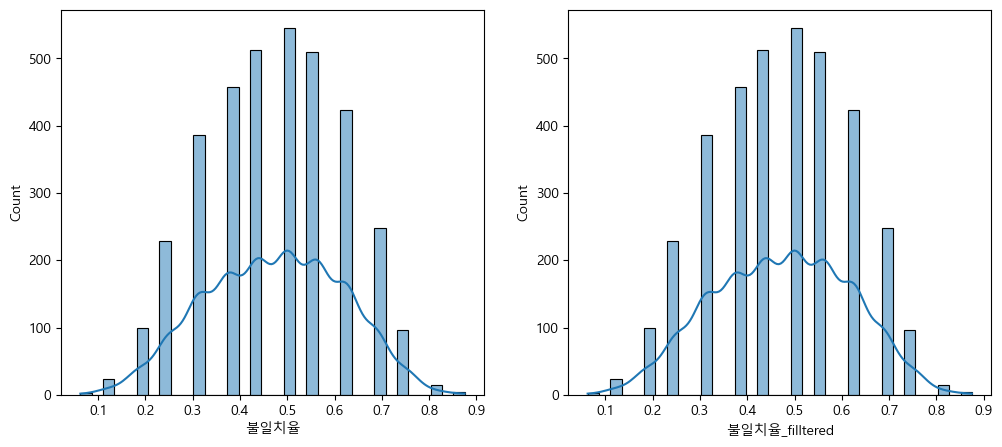

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 부호 깨짐 방지
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(result['불일치율'],kde=True)
plt.subplot(1, 2, 2)
sns.histplot(result_refined['불일치율_filltered'],kde=True)

In [63]:
trav_mas_df['불일치율'] = result['불일치율']

In [64]:
trav_mas_df.dropna(inplace=True)

In [65]:
trav_mas_df

,여행ID,여행동기1,여행동행_유형,연령대,불일치율
0,a_a000155,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",자녀 동반 여행,30,0.2500
1,a_a000193,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",2인 여행(가족 외),20,0.3750
2,a_a000316,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",2인 가족 여행,50,0.3125
3,a_a000330,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",자녀 동반 여행,50,0.1875
4,a_a000423,새로운 경험 추구,2인 여행(가족 외),20,0.5000
...,...,...,...,...,...
3548,b_b018750,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",나홀로 여행,40,0.3125
3549,b_b018751,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",2인 여행(가족 외),20,0.2500
3550,b_b018815,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",나홀로 여행,60,0.5625
3551,c_c000249,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",나홀로 여행,50,0.5625


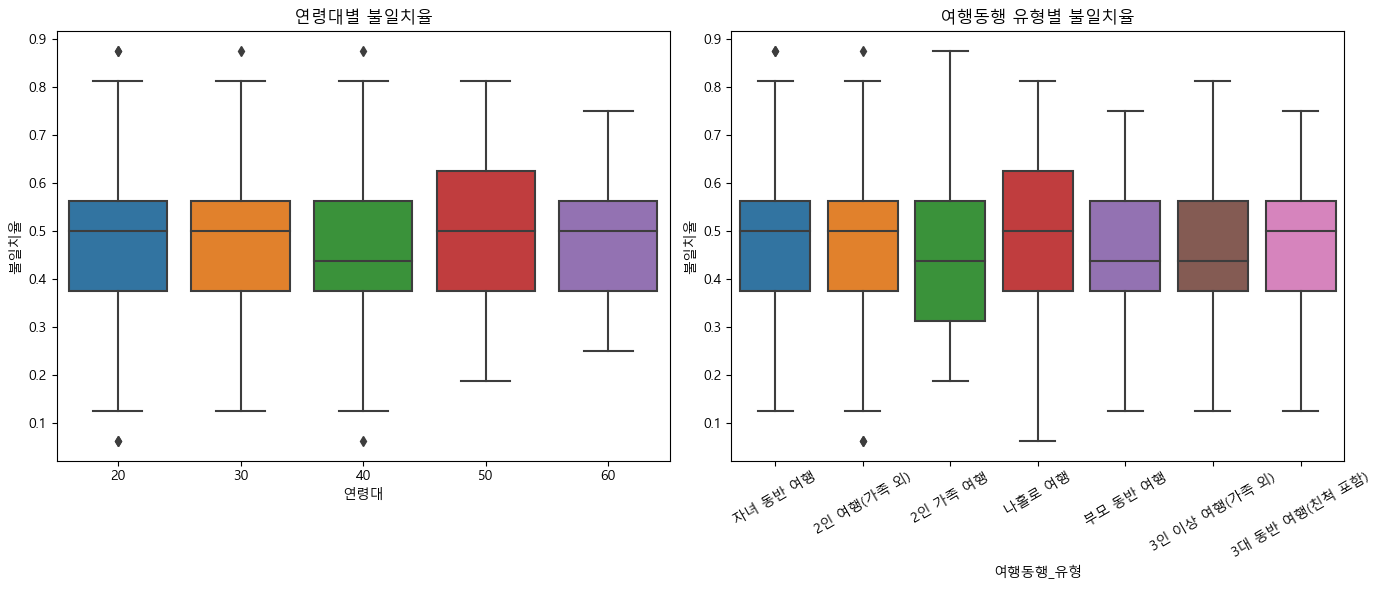

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 깨짐 방지 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 그림 틀 설정
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 연령대별 불일치율
sns.boxplot(data=trav_mas_df, x='연령대', y='불일치율', ax=axes[0])
axes[0].set_title('연령대별 불일치율')

# 여행동행 유형별 불일치율
sns.boxplot(data=trav_mas_df, x='여행동행_유형', y='불일치율', ax=axes[1])
axes[1].set_title('여행동행 유형별 불일치율')
axes[1].tick_params(axis='x', rotation=30)  # 라벨 기울이기

plt.tight_layout()
plt.show()

In [67]:
from scipy.stats import shapiro

# 결과 저장용
results = []

# 연령대별 정규성 검정
for name, group in trav_mas_df.groupby('연령대'):
    stat, p = shapiro(group['불일치율'])
    results.append((name, len(group), stat, p))

# 결과 보기
import pandas as pd
result_df = pd.DataFrame(results, columns=['연령대', '샘플 수', 'Shapiro-W', 'p-value'])
result_df['정규성 여부'] = result_df['p-value'].apply(lambda p: '정규성 만족' if p > 0.05 else '위반')
result_df.sort_values(by='연령대')


,연령대,샘플 수,Shapiro-W,p-value,정규성 여부
0,20,1262,0.978754,1.131773e-12,위반
1,30,1291,0.974753,3.026198e-14,위반
2,40,637,0.976443,1.341270e-08,위반
3,50,265,0.963916,3.349491e-06,위반
4,60,98,0.961530,5.808468e-03,위반


In [68]:
results = []

for name, group in trav_mas_df.groupby('여행동행_유형'):
    stat, p = shapiro(group['불일치율'])
    results.append((name, len(group), stat, p))

result_df = pd.DataFrame(results, columns=['동행유형', '샘플 수', 'Shapiro-W', 'p-value'])
result_df['정규성 여부'] = result_df['p-value'].apply(lambda p: '정규성 만족' if p > 0.05 else '위반')
result_df.sort_values(by='p-value')


,동행유형,샘플 수,Shapiro-W,p-value,정규성 여부
4,나홀로 여행,994,0.972498,8.900558e-13,위반
1,2인 여행(가족 외),1007,0.976447,1.043542e-11,위반
6,자녀 동반 여행,499,0.976802,4.025417e-07,위반
3,3인 이상 여행(가족 외),515,0.977912,5.000841e-07,위반
0,2인 가족 여행,279,0.967329,5.714237e-06,위반
5,부모 동반 여행,179,0.975637,3.145871e-03,위반
2,3대 동반 여행(친척 포함),80,0.968885,4.819047e-02,위반


In [69]:
from scipy.stats import kruskal

groups = [group["불일치율"].values for name, group in trav_mas_df.groupby("연령대")]
stat, p = kruskal(*groups)
print(f"연령대별 Kruskal-Wallis 결과: H={stat:.3f}, p={p:.3f}")


연령대별 Kruskal-Wallis 결과: H=4.602, p=0.331


In [70]:
groups = [group["불일치율"].values for name, group in trav_mas_df.groupby("여행동행_유형")]
stat, p = kruskal(*groups)
print(f"동행 유형별 Kruskal-Wallis 결과: H={stat:.3f}, p={p:.3f}")


동행 유형별 Kruskal-Wallis 결과: H=19.640, p=0.003
